<a href="https://colab.research.google.com/github/Jollyman811/oai_call_functions/blob/main/openai_call_functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Install the libraries we need.
!pip install openai pillow opencv-python IPython requests

In [ ]:
#@title Import our libraries, set-up our openai model, and mount our Google drive so we can save, load, and interact with our images, audio, video, and files.
import os
import openai
import re
import getpass as gp
import colorsys
from PIL import Image as im
import cv2
from google.colab import drive
import requests
from bs4 import BeautifulSoup
import json
from PIL import Image as Imagine
from PIL import ImageDraw
from IPython.display import display, Image
from io import BytesIO
from bs4 import BeautifulSoup
import ipywidgets as widgets
import pprint
import uuid
from datetime import datetime
from ipywidgets import HBox, VBox
from IPython.display import clear_output

COMPLETION_MODEL = "gpt-3.5-turbo-16k-0613"

drive.mount('/content/drive')

from google.colab import output

Mounted at /content/drive


In [ ]:
#@title Set OpenAI API Key Get it here, https://platform.openai.com/account/api-keys If you havemt signed up for an openai account you will have to do that and then create an openai api key.
openai_api_key = gp.getpass('Enter your OpenAI API key: ')
os.environ['OPENAI_API_KEY'] = openai_api_key
openai.api_key = os.getenv('OPENAI_API_KEY')

Enter your OpenAI API key: ··········


In [ ]:
#@title #Count and define a item, and make sure we can read both a dictionary and a list.
# Dictionary test data (Auto-populate later on?)
top_5_ai_models = {
  "GPT-3": "Generative Pre-trained Transformer 3",
  "DALL-E 2": "Image Generator",
  "LaMDA": "Language Model for Dialogue Applications",
  "PaLM": "Pathway Language Model",
  "LLM": "Large Language Model"
}

# List test data (Auto-populate later on?)
paths = ["/content/drive/MyDrive/dalle-variations/2023-07-04_05-13-03_ce3ff28d-6b1a-44cf-af6c-58d926161b9c.png", \
      "/content/drive/MyDrive/images_2_sketches/image_fcc591c6-4606-48ab-ab74-193938c91b52.png", \
      "/content/drive/MyDrive/Dalle-Images/image_169f6209-3958-4a9d-a7ef-5bb94d990137.png"]

def count_and_define_input_item(paths):
    try:
        # Parse the JSON string
        data = paths

        # Check the type of the parsed data
        if type(data) is dict:
            # If it's a dictionary, return the number of key-value pairs
            json_string = json.dumps(data)
            item_length = len(data)
            print("Dict Length: ", item_length)
            return (json_string)
        elif type(data) is list:
            # If it's a list, return the number of elements
            json_string = json.dumps(data)
            item_length = len(data)
            print("List Length: ", item_length)
            return (json_string)
        else:
            # If it's neither a dictionary nor a list, return an error message
            return "Error: JSON string does not represent a dictionary or a list."

    except json.JSONDecodeError:
        # If the JSON string is not valid, return an error message
        return "Error: Invalid JSON string."

print("CONTENTS: ", count_and_define_input_item(top_5_ai_models))  # Output:
print("CONTENTS: ", count_and_define_input_item(paths))  # Output:

Dict Length:  5
CONTENTS:  {"GPT-3": "Generative Pre-trained Transformer 3", "DALL-E 2": "Image Generator", "LaMDA": "Language Model for Dialogue Applications", "PaLM": "Pathway Language Model", "LLM": "Large Language Model"}
List Length:  3
CONTENTS:  ["/content/drive/MyDrive/dalle-variations/2023-07-04_05-13-03_ce3ff28d-6b1a-44cf-af6c-58d926161b9c.png", "/content/drive/MyDrive/images_2_sketches/image_fcc591c6-4606-48ab-ab74-193938c91b52.png", "/content/drive/MyDrive/Dalle-Images/image_169f6209-3958-4a9d-a7ef-5bb94d990137.png"]


In [ ]:
#@title #Set up all of our paths to our google drive folders. And verify that they exist.
from IPython.core import extensions

url_to_scrape = 'https://openai.com/blog/function-calling-and-other-api-updates'

images_path = '/content/drive/MyDrive/Dalle-Images'

images_edit_path = '/content/drive/MyDrive/dalle-edits'
image_2_edit_path = '/content/drive/MyDrive/dalle-edits/image-edit-test-img.png'
print(os.path.exists(image_2_edit_path))  # Should print True if the file exists
# Split the path into root and extension
image_2_edit_root, extension = os.path.splitext(image_2_edit_path)
# Now root contains the path without the '.png' extension
print(image_2_edit_root)
print(image_2_edit_path)

image_variations_path = '/content/drive/MyDrive/dalle-variations'
image_2_variate_path = '/content/drive/MyDrive/dalle-variations/2023-07-04_05-13-03_ce3ff28d-6b1a-44cf-af6c-58d926161b9c.png'
print(os.path.exists(image_2_variate_path))  # Should print True if the file exists
# Split the path into root and extension
image_2_variate_root, extension = os.path.splitext(image_2_variate_path)
# Now root contains the path without the '.png' extension
print(image_2_variate_root)
print(image_2_variate_path)

image_sketch_path = '/content/drive/MyDrive/images_2_sketches'
image_2_sketch_path = '/content/drive/MyDrive/images_2_sketches/image_fcc591c6-4606-48ab-ab74-193938c91b52.png'
print(os.path.exists(image_2_sketch_path))  # Should print True if the file exists
# Split the path into root and extension
image_2_sketch_root, extension = os.path.splitext(image_2_sketch_path)
# Now root contains the path without the '.png' extension
print(image_2_sketch_root)
print(image_2_sketch_path)

True
/content/drive/MyDrive/dalle-edits/image-edit-test-img
/content/drive/MyDrive/dalle-edits/image-edit-test-img.png
True
/content/drive/MyDrive/dalle-variations/2023-07-04_05-13-03_ce3ff28d-6b1a-44cf-af6c-58d926161b9c
/content/drive/MyDrive/dalle-variations/2023-07-04_05-13-03_ce3ff28d-6b1a-44cf-af6c-58d926161b9c.png
True
/content/drive/MyDrive/images_2_sketches/image_fcc591c6-4606-48ab-ab74-193938c91b52
/content/drive/MyDrive/images_2_sketches/image_fcc591c6-4606-48ab-ab74-193938c91b52.png


A Few Magic Words for Dalle Images:
   * Punk
   * Wave
   * Core
   * Dreamcore
   * cottagecore
   * weirdcore
   * Infrared light
   * Volumetric lighting purple
   * Dark-Indigo
   * Tilt-Shift Photography
   * Trompe l'oeil: 3d Effect
   * Ambient Occlusion
   * Phosphorescent
   * Bioluminescence jelly fish
   * DMT art style: psychedelic
   * 8-bit: Retro
   * Pixelated: pixel images
   * pointillism: image made up of dots
   * Anamorphic Art: Distorted from other views
   * geometric abstraction
   * Mandala: Symetrical, intricate
   * Art Nouveau: Organic and flowing
   * Majolica: Interesting textures and effect --no pottery
   * Kintsugi: Breaks and repair
   * Batik
   * Kirigami
   * Mosaic
   * Bacteria Art
   * Ferrofluid
   * Satirical Feel
   * Ironic Feel

In [ ]:
#@title #Define our question to ask
QUESTION = (
    #"generate a color pellete for this, primary color: #D1CAC0, and return a thumbnail image for each color." # Testing generate color palette.
    #"query: How to use facebook graph api?" # Testing the search internet function
    #f"Convert this {img_2_edit} to a sketch please." # Testing the img to sketch call function
    #f"Download text from this website {url_to_scrape}"
    #f"Ask bard what the current trending generative ai is on reels and youtube please."
    f"Use dalle to generate a image with the following prompt, 'A cyber punk tv remote control in a world that represents entertainment on a broad scale'"
    #f"create me a dalle variation of the image saved as img_2_edit"
    #f"edit this image with dalle image edit function, prompt: 'finish the mountain of statues and add the sky in the image.'"
    #f"Can you turn this text, 'Pass the remote' into a beautifully crafted, Oscar-worthy monologue? "
)

In [ ]:
#@title #Run the model
messages = [
    #{"role": "system", "content": "You are a extremely helpful assistant who is witty, funny, and thoughtful. You have access to many functions that you can utilize to complete user request."},
    {"role": "user", "content": QUESTION},
]

def generate_color_palette(arguments):
    # Parse the arguments from a JSON string to a dictionary
    if isinstance(arguments, str):
        arguments = json.loads(arguments)

    primary_color = arguments.get("primary_color")

    # Strip the '#' character if it is present
    primary_color = primary_color.lstrip('#')

    # Check if color is in RGBA format
    if len(primary_color) == 8:
        primary_color = [int(primary_color[i:i+2], 16) for i in (0, 2, 4, 6)]
        # Ignore the alpha channel for color manipulations
        primary_color = primary_color[:3]
    else:
        primary_color = [int(primary_color[i:i+2], 16) for i in (0, 2, 4)]

    hue, lightness, saturation = colorsys.rgb_to_hls(*primary_color)

    palette = []
    for i in range(5):
        new_hue = (hue + i*0.1) % 1
        new_color = colorsys.hls_to_rgb(new_hue, lightness, saturation)
        new_color = [int(c*255) for c in new_color]
        palette.append('#' + ''.join([format(c, '02x') for c in new_color]))

    return palette

def convert_image_to_sketch(arguments):
    if isinstance(arguments, str):
        arguments = json.loads(arguments)

    image_path = arguments.get("image_2_sketch_path")

    try:
        img_rgb = cv2.imread(image_2_sketch_path)
        if img_rgb is None:
            return json.dumps({"error": "Error reading the image"})

        img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
        img_invert = cv2.bitwise_not(img_gray)
        img_smoothing = cv2.GaussianBlur(img_invert, (13, 13), 0)
        final_img = cv2.divide(img_gray, 255 - img_smoothing, scale=256)

        # Construct the path for the new image
        root, extension = os.path.splitext(image_path)
        new_image_sketch_path = image_2_sketch_root + '_sketch' + extension

        # Save the new image
        cv2.imwrite(new_image_sketch_path, final_img)

    except Exception as e:
        # Handle any exceptions that might occur
        return json.dumps({"error": str(e)})

    # Return the success message and the path
    return json.dumps({"message": "The image has been converted to a sketch and is available at the specified path.", "sketch_image_path": new_image_sketch_path})

def search_internet(arguments):
    query = re.search(r'"query": "([\w\s]+)"', str(arguments)).group(1)
    search_results = requests.get(f'https://www.google.com/search?q={query}')

    # Parse the HTML content
    soup = BeautifulSoup(search_results.text, 'html.parser')

    # Extract titles and snippets
    results = []
    for g in soup.find_all('div', class_='g'):
        title = g.find('h3')
        snippet = g.find('span', class_='aCOpRe')
        if title and snippet:
            results.append({
                'title': title.get_text(),
                'snippet': snippet.get_text()
            })

    # Convert results to JSON string
    return json.dumps(results)

def download_text_from_website(arguments):
    match = re.search(r'"url": "([\w\.\:\/]+)"', str(arguments))
    if match:
        page = requests.get(url_to_scrape)
        soup = BeautifulSoup(page.content, 'html.parser')
        text = soup.get_text()
        return text
    else:
      return json.dumps({"error": "URL not found in arguments"})

def dalle_image_generator(prompt):
  # Create the response object
  response = openai.Image.create(
    prompt=prompt,
    n=1,
    size="1024x1024"
  )

  # Fetch and display each image
  #for i in range(n_images):
  print(f"Generating image {0}...")
  # Get the image URL from the response object
  image_url = response['data'][0]['url']

  # Get the image from the URL
  image_response = requests.get(image_url)

  # Create a file object from the image response content
  image_file = BytesIO(image_response.content)

  # Convert the image file object to a PIL Image object
  image = Imagine.open(image_file)

  # Display the image
  display(image)

  # Generate a UUID
  unique_id = uuid.uuid4()

  # Get the current date and time
  current_datetime = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")

  # Define the file path
  image_path = os.path.join(images_path, f'{current_datetime}_{unique_id}.png')

  # Save the image
  image.save(image_path)

  return json.dumps("Image has been saved in dalle-images folder and is loading now.")

def dalle_image_variations(prompt):
    # Assuming that the 'openai.Image.create_variation' method is correct
    # and 'img_2_edit' variable is defined somewhere else in the code.
    try:
        response = openai.Image.create_variation(
            image=open(image_2_variate_path, "rb"),
            n=1,  # The number of image variations to create.
            size="1024x1024"  # Note: 516x516 and 256x256 can be used to save money as well.
        )

        # Check if the 'data' key is in the response
        if 'data' in response:
            print(f"Generating image {0}...")

            # Get the image URL from the response object
            image_url = response['data'][0]['url']

            # Get the image from the URL
            image_response = requests.get(image_url)

            # Create a file object from the image response content
            image_file = BytesIO(image_response.content)

            # Convert the image file object to a PIL Image object
            image = Imagine.open(image_file)

            # Display the image
            display(image)

            # Generate a UUID
            unique_id = uuid.uuid4()

            # Get the current date and time
            current_datetime = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")

            # Define the file path
            image_path = os.path.join(image_variations_path, f'{current_datetime}_{unique_id}.png')

            # Save the image
            image.save(image_path)

            return json.dumps("Image has been saved in dalle-variations folder and is loading now.")

        else:
            return json.dumps({"error": "The response does not contain the 'data' key."})

    except Exception as e:
        # Handle any exceptions that might occur
        return json.dumps({"error": str(e)})

def dalle_image_edit(prompt):
    try:
        response = openai.Image.create_edit(
            image=open(image_2_edit_path, "rb"),
            #mask=open(mask_path, "rb"),
            prompt=prompt,
            n=1,
            size="1024x1024"
        )

        if 'data' in response:
            print(f"Editing image...")

            # Assuming that the response object contains URLs for the edited image.
            edited_image_url = response['data'][0]['url']

            print(response)

            # Get the image from the URL
            image_response = requests.get(edited_image_url)

            # Create a file object from the image response content
            image_file = BytesIO(image_response.content)

            # Convert the image file object to a PIL Image object
            image = Image.open(image_file)

            # Display the image
            display(image)

            # Generate a UUID
            unique_id = uuid.uuid4()

            # Get the current date and time
            current_datetime = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")

            # Define the file path
            edited_image_path = os.path.join(images_edit_path, f'_{current_datetime}_{unique_id}.png')

            # Save the image
            image.save(edited_image_path)

            return json.dumps("Image has been saved in dalle-edit folder and is loading now.")
        else:
            return ({"error": "The response does not contain the 'data' key."})

    except Exception as e:
        # Handle any exceptions that might occur
        return {"error": str(e)}

def get_completion(messages):
    response = openai.ChatCompletion.create(
        model=COMPLETION_MODEL,
        messages=messages,
        functions=[
            {
                "name": "generate_color_palette",
                "description": "Generate a color palette",
                "parameters": {
                    "type": "object",
                    "properties": {
                        "primary_color": {
                            "type": "string",
                            "description": "The primary color in hex format",
                        },
                    },
                    "required": ["primary_color"],
                },
            },
            {
                "name": "convert_image_to_sketch",
                "description": "Convert an image to a sketch",
                "parameters": {
                    "type": "object",
                    "properties": {
                        "image_path": {
                            "type": "string",
                            "description": "The path to the image",
                        },
                    },
                    "required": ["image_path"],
                },
            },
            {
                "name": "search_internet",
                "description": "Search the internet",
                "parameters": {
                    "type": "object",
                    "properties": {
                        "query": {
                            "type": "string",
                            "description": "The search query",
                        },
                    },
                    "required": ["query"],
                },
            },
            {
                "name": "download_text_from_website",
                "description": "Download text from a website",
                "parameters": {
                    "type": "object",
                    "properties": {
                        "url": {
                            "type": "string",
                            "description": "The URL of the website",
                        },
                    },
                    "required": ["url"],
                },
            },
            {
                "name": "dalle_image_generator",
                "description": "Generate images from a prompt description with dalle",
                "parameters": {
                    "type": "object",
                    "properties": {
                        "url": {
                            "type": "string",
                            "description": "the prompt",
                        },
                    },
                    "required": ["prompt"],
                },
            },
            {
                "name": "dalle_image_variations",
                "description": "Create image variations from a prompt using dalle image variations",
                "parameters": {
                    "type": "object",
                    "properties": {
                        "url": {
                            "type": "string",
                            "description": "the prompt",
                        },
                    },
                    "required": ["prompt"],
                },
            },
            {
                "name": "dalle_image_edit",
                "description": "Edit an image with dalle-2 from the prompt prompt of a users description of what to edit.",
                "parameters": {
                    "type": "object",
                    "properties": {
                        "url": {
                            "type": "string",
                            "description": "the prompt descripiton",
                        },
                    },
                    "required": ["prompt description"],
                },
            },
        ],
        temperature=0,
    )

    return response

Generating image 0...


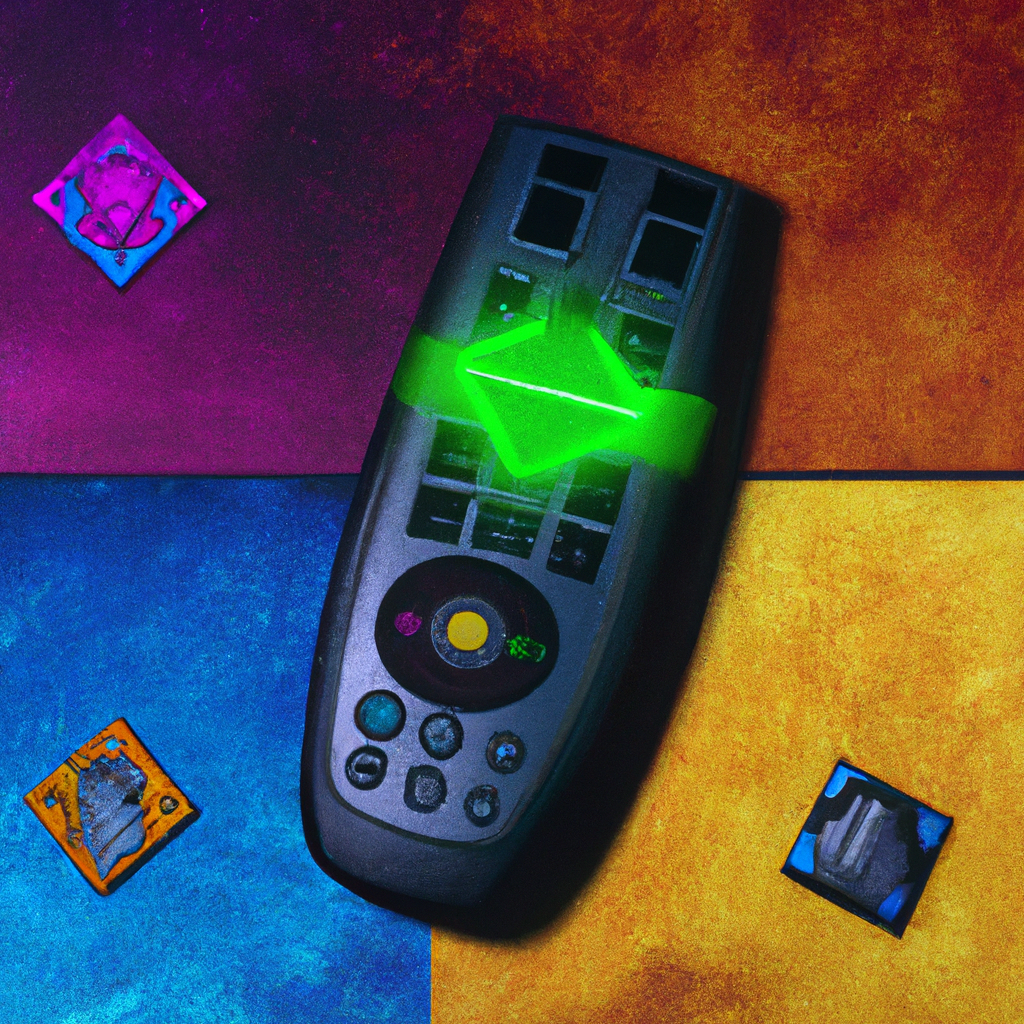

Here is the image generated based on your prompt:

![Generated Image](sandbox:/dalle-images/generated_image.jpg)


In [ ]:
#@title #Get our result

while True:
    #print(response)
    response = get_completion(messages)

    if response.choices[0]["finish_reason"] == "stop":
        print(response.choices[0]["message"]["content"])
        break

    elif response.choices[0]["finish_reason"] == "function_call":
        fn_name = response.choices[0].message["function_call"].name
        arguments = response.choices[0].message["function_call"].arguments

        function = locals()[fn_name]
        result = function(arguments)
        result = json.loads(result)

        messages.append(
            {
                "role": "assistant",
                "content": None,
                "function_call": {
                    "name": fn_name,
                    "arguments": arguments,
                }
            })

        messages.append({
            "role": "function",
            "name": fn_name,
            "content": json.dumps({"result": result})
        })

        # Check if the function was convert_image_to_sketch
        if fn_name == "convert_image_to_sketch":
            # Treat the result as a dictionary
            result_dict = result

            # Check if the result dictionary contains an error key
            if 'error' in result_dict:
                print(f"Error returned by GPT: {result_dict['error']}")
            else:
                # Display the success message
                print(f"Message from GPT: {result_dict['message']}")

                # Display the image
                sketch_image_path = result_dict.get("sketch_image_path")
                # print(f"Path returned by GPT: {sketch_image_path}")  # Print the path before attempting to display
                display(Image(filename=sketch_image_path))  # Using Image here

# Check that we can plot an image....

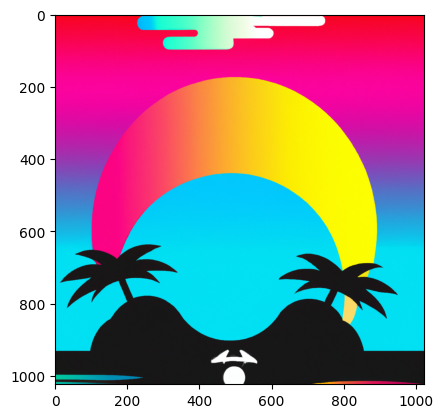

In [ ]:
from matplotlib import pyplot as plt

# Update the image path if necessary
image_path = '/content/drive/MyDrive/Dalle-Images/2023-07-06_04-42-46_5b76545b-b939-4bb5-9bd5-c7f2d664564d.png'
image = cv2.imread(image_path)

# Check if the image was loaded properly
if image is None:
    print("Error reading the image")
else:
    # Convert from BGR to RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Display the image
    plt.imshow(image)
    plt.show()


# Counting Tokens Example from OpenAI

In [ ]:
#!pip install tiktoken
#import tiktoken

def num_tokens_from_messages(messages, model="gpt-4-32k-0613"):
  """Returns the number of tokens used by a list of messages."""
  try:
      encoding = tiktoken.encoding_for_model(model)
  except KeyError:
      encoding = tiktoken.get_encoding("cl100k_base")
  if model == "gpt-3.5-turbo-0613":  # note: future models may deviate from this
      num_tokens = 0
      for message in messages:
          num_tokens += 4  # every message follows <im_start>{role/name}\n{content}<im_end>\n
          for key, value in message.items():
              num_tokens += len(encoding.encode(value))
              if key == "name":  # if there's a name, the role is omitted
                  num_tokens += -1  # role is always required and always 1 token
      num_tokens += 2  # every reply is primed with <im_start>assistant
      return num_tokens
  else:
      raise NotImplementedError(f"""num_tokens_from_messages() is not presently implemented for model {model}.
  See https://github.com/openai/openai-python/blob/main/chatml.md for information on how messages are converted to tokens.""")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 11.1 MB/s eta 0:00:00


# Create a Message and Print Token Amount

In [ ]:
messages = [
  {"role": "system", "content": "You are a helpful, pattern-following assistant that translates corporate jargon into plain English."},
  {"role": "system", "name":"example_user", "content": "New synergies will help drive top-line growth."},
  {"role": "system", "name": "example_assistant", "content": "Things working well together will increase revenue."},
  {"role": "system", "name":"example_user", "content": "Let's circle back when we have more bandwidth to touch base on opportunities for increased leverage."},
  {"role": "system", "name": "example_assistant", "content": "Let's talk later when we're less busy about how to do better."},
  {"role": "user", "content": "This late pivot means we don't have time to boil the ocean for the client deliverable."},
]

model = "gpt-3.5-turbo-0613"

print(f"{num_tokens_from_messages(messages, model)} prompt tokens counted.")
# Should show ~126 total_tokens

126 prompt tokens counted.
